# F&B Data Analysis

In [27]:
# Dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# Import Yahoo Finance library to get Stock Market Data
import yfinance as yf

In [35]:
# Get stocks from library
fbstocks = yf.Tickers("tsn bmboy bud")
fbstocks_hist = fbstocks.history(start="2018-08-07", end="2023-08-07")
fbstocks_hist

# why not do this instead of the other way? we could plot by columns anyway...

[*********************100%***********************]  3 of 3 completed


Close                       Dividends                 High  \
                BMBOY        BUD        TSN     BMBOY  BUD  TSN      BMBOY   
Date                                                                         
2018-08-07   8.177944  93.330223  53.040047       0.0  0.0  0.0   8.177944   
2018-08-08   8.177944  92.200073  52.747742       0.0  0.0  0.0   8.177944   
2018-08-09   8.076982  92.366814  52.880608       0.0  0.0  0.0   8.076982   
2018-08-10   8.076982  89.328377  53.305779       0.0  0.0  0.0   8.076982   
2018-08-13   7.748397  89.300598  53.040047       0.0  0.0  0.0   7.893415   
...               ...        ...        ...       ...  ...  ...        ...   
2023-07-31  20.299999  57.299999  55.720001       0.0  0.0  0.0  20.299999   
2023-08-01  20.299999  56.840000  55.320000       0.0  0.0  0.0  20.299999   
2023-08-02  20.299999  56.230000  55.410000       0.0  0.0  0.0  20.299999   
2023-08-03  20.299999  56.980000  56.270000       0.0  0.0  0.0  20.299999   
2023-08-04  20.299999  56.490002  56.459999       0.0  0.0  0.0  20.299999   

                                        Low  ...                  Open  \
                  BUD        TSN      BMBOY  ...        TSN      BMBOY   
Date                                         ...                         
2018-08-07  93.561812  53.420929   8.003555  ...  51.817680   8.177944   
2018-08-08  92.802205  53.491791   8.177944  ...  52.676882   8.177944   
2018-08-09  92.950414  53.119767   8.076982  ...  52.517441   8.076982   
2018-08-10  90.458531  53.624657   8.076982  ...  52.703453   8.076982   
2018-08-13  89.606297  53.394354   7.728204  ...  52.800888   7.893415   
...               ...        ...        ...  ...        ...        ...   
2023-07-31  58.160000  56.599998  20.299999  ...  55.439999  20.299999   
2023-08-01  57.299999  55.900002  20.299999  ...  55.209999  20.299999   
2023-08-02  56.320000  55.910000  20.299999  ...  54.799999  20.299999   
2023-08-03  57.459999  56.660000  20.299999  ...  55.130001  20.299999   
2023-08-04  57.279999  57.150002  20.299999  ...  56.360001  20.299999   

                                 Stock Splits           Volume           \
                  BUD        TSN        BMBOY  BUD  TSN  BMBOY      BUD   
Date                                                                      
2018-08-07  93.265379  52.393433          0.0  0.0  0.0   5102   522800   
2018-08-08  92.644727  52.845177          0.0  0.0  0.0      0   873100   
2018-08-09  92.653981  52.845176          0.0  0.0  0.0    600   639400   
2018-08-10  90.060198  52.721169          0.0  0.0  0.0      0  1931100   
2018-08-13  89.504397  53.102050          0.0  0.0  0.0   3100  1141600   
...               ...        ...          ...  ...  ...    ...      ...   
2023-07-31  57.799999  56.400002          0.0  0.0  0.0    177  3445600   
2023-08-01  57.150002  55.720001          0.0  0.0  0.0      0  3107200   
2023-08-02  55.750000  55.000000          0.0  0.0  0.0      0  3449500   
2023-08-03  57.459999  55.310001          0.0  0.0  0.0      0  4231600   
2023-08-04  56.430000  56.540001          0.0  0.0  0.0    205  3166700   

                     
                TSN  
Date                 
2018-08-07  4027500  
2018-08-08  2398100  
2018-08-09  3383000  
2018-08-10  2601400  
2018-08-13  2536400  
...             ...  
2023-07-31  6102500  
2023-08-01  2510600  
2023-08-02  2419500  
2023-08-03  3207500  
2023-08-04  3899100  

[1257 rows x 21 columns]

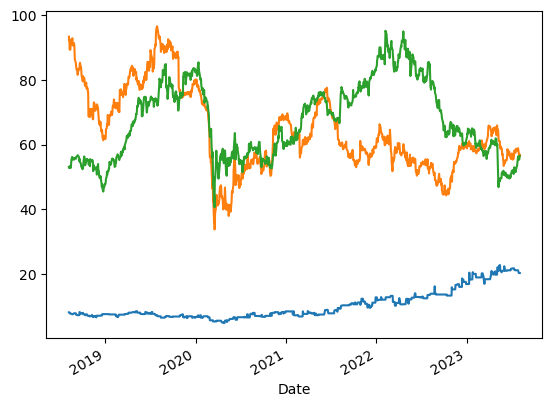

In [47]:
# Date vs Stock Value for each Stock:
bmboy = fbstocks_hist["Close"]["BMBOY"]
bud = fbstocks_hist["Close"]["BUD"]
tsn = fbstocks_hist["Close"]["TSN"]
bmboy.plot()
bud.plot()
tsn.plot()
plt.show()

In [33]:
# get the data
fnastocks_df = pd.DataFrame([{"Ticker":"","Date":"","Open":0,"High":0,"Low":0,"Close":0,"Adj Close":0,"Volume":0}])

stocks = ["TSN","BMBOY","BUD"]
timeframe = "5y"
for stock in stocks:
    try:
        data = yf.download(stock, period=timeframe)
        data["Ticker"] = stock
        data = data.reset_index()
        fnastocks_df = fnastocks_df.append(data, ignore_index=True)
    except:
        print(f"{stock} not found")

fnastocks_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/_t/scbbyxlx46g2wd63k7994ztm0000gn/T/ipykernel_9712/1288957045.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fnastocks_df = fnastocks_df.append(data, ignore_index=True)
/var/folders/_t/scbbyxlx46g2wd63k7994ztm0000gn/T/ipykernel_9712/1288957045.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fnastocks_df = fnastocks_df.append(data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed


/var/folders/_t/scbbyxlx46g2wd63k7994ztm0000gn/T/ipykernel_9712/1288957045.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fnastocks_df = fnastocks_df.append(data, ignore_index=True)


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,,,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,TSN,2018-08-08 00:00:00,59.660000,60.389999,59.470001,59.549999,52.747742,2398100
2,TSN,2018-08-09 00:00:00,59.660000,59.970001,59.290001,59.700001,52.880608,3383000
3,TSN,2018-08-10 00:00:00,59.520000,60.540001,59.500000,60.180000,53.305786,2601400
4,TSN,2018-08-13 00:00:00,59.950001,60.279999,59.610001,59.880001,53.040047,2536400
